Dataset Preview:
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]

Missing Values in Each Column:
school        0
sex           0
age    

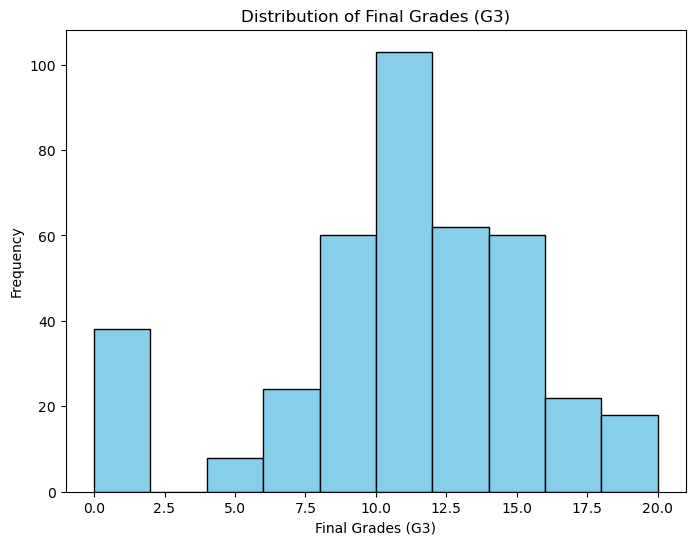

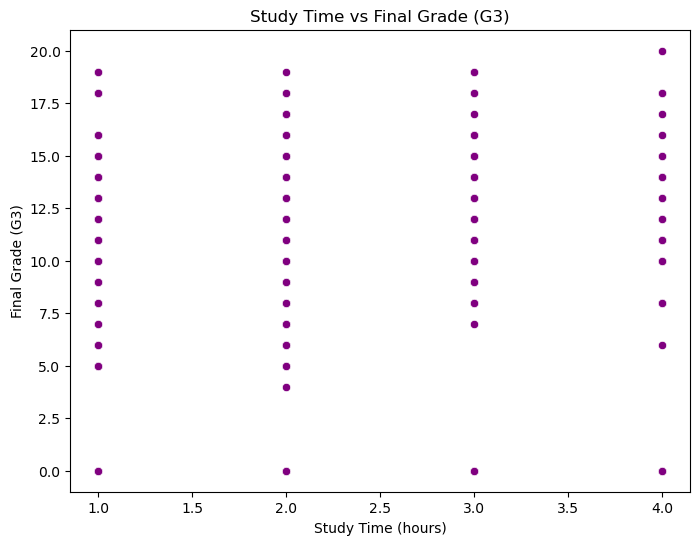

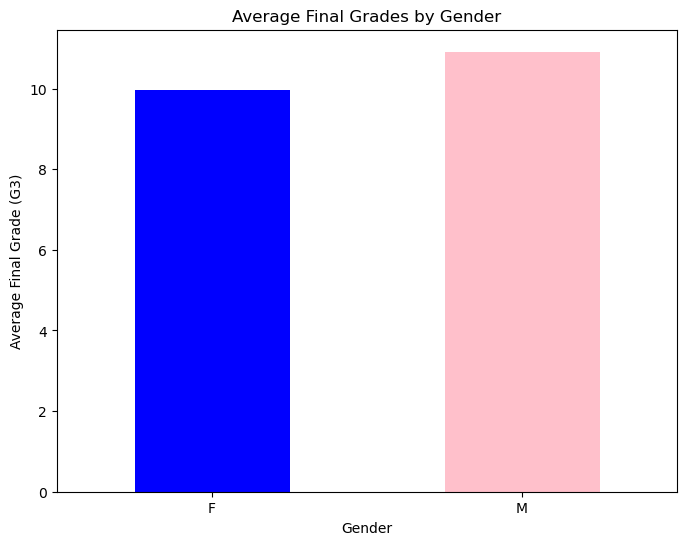


Task Completed!


In [82]:
# Step 1: Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load the Dataset
# Ensure the file path is correct
data = pd.read_csv(r"C:\Users\Anandhu\data science\student\student-mat.csv", sep=";")

# Display the first few rows of the dataset
print("Dataset Preview:")
print(data.head())

# Step 3: Data Exploration
# Check for missing values
print("\nMissing Values in Each Column:")
print(data.isnull().sum())

# Display column data types
print("\nColumn Data Types:")
print(data.dtypes)

# Display dataset size
print("\nDataset Size (Rows, Columns):")
print(data.shape)

# Step 4: Data Cleaning
# Handle missing values
# Fill missing values for numeric columns with their median
numeric_columns = data.select_dtypes(include=["number"]).columns
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].median())

# Fill missing values for non-numeric columns with their mode
categorical_columns = data.select_dtypes(include=["object"]).columns
for col in categorical_columns:
    data[col] = data[col].fillna(data[col].mode()[0])  # Fixed the chained assignment warning

# Remove duplicate entries
data = data.drop_duplicates()

print("\nData Cleaning Completed.")
print(f"Cleaned Dataset Size: {data.shape}")

# Step 5: Data Analysis Questions
# Question 1: Average score in G3
avg_score = data['G3'].mean()
print(f"\nAverage Score in G3: {avg_score}")

# Question 2: Number of students scoring above 15 in G3
above_15 = data[data['G3'] > 15].shape[0]
print(f"Number of Students Scoring Above 15 in G3: {above_15}")

# Question 3: Correlation between study time and G3
correlation = data['studytime'].corr(data['G3'])
print(f"Correlation Between Study Time and G3: {correlation}")

# Question 4: Average G3 scores by gender
avg_gender = data.groupby('sex')['G3'].mean()
print("\nAverage G3 Scores by Gender:")
print(avg_gender)

# Step 6: Data Visualization
# Visualization 1: Histogram of final grades (G3)
plt.figure(figsize=(8, 6))
plt.hist(data['G3'], bins=10, color='skyblue', edgecolor='black')
plt.title("Distribution of Final Grades (G3)")
plt.xlabel("Final Grades (G3)")
plt.ylabel("Frequency")
plt.show()

# Visualization 2: Scatter plot of study time vs final grade (G3)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['studytime'], y=data['G3'], color='purple')
plt.title("Study Time vs Final Grade (G3)")
plt.xlabel("Study Time (hours)")
plt.ylabel("Final Grade (G3)")
plt.show()

# Visualization 3: Bar chart of average G3 scores by gender
plt.figure(figsize=(8, 6))
avg_gender.plot(kind='bar', color=['blue', 'pink'])
plt.title("Average Final Grades by Gender")
plt.xlabel("Gender")
plt.ylabel("Average Final Grade (G3)")
plt.xticks(rotation=0)
plt.show()

print("\nTask Completed!")